<a href="https://colab.research.google.com/github/hafizhperdana/TugasBesarProbstat/blob/main/JMK_13524025_13524070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas Besar IF2120 Probabilitas dan Statistika 2025/2026**

### Topik : **Life-Style**


K01 - Kelompok 31

Anggota Kelompok :
1. Moh. Hafizh Irham Perdana - 13524025
2. A. Fawwaz Azam Wicaksono - 13524070

## Inisialisasi Dependencies dan Load Data

Import required libraries

In [14]:
# Sesuaikan dengan kebutuhan, uncomment yang perlu, hapus yang ga perlu, dan tambahkan jika perlu
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load Data

In [15]:
import gdown

# Ambil file_id dari link gdrive dataset
# https://drive.google.com/file/d/1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM/view?usp=sharing -> file_id = 1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM

# Kemudian, masukan file_id dengan template url berikut
# https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM

url = "https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM"

output = "Life-Style.csv"
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1UmbA42IocF4drZDSwcn2tF9zXgLZmhoM
To: d:\---Kuliah\Code room semester 3\Probstat\TugasBesarProbstat\Life-Style.csv
100%|██████████| 233k/233k [00:00<00:00, 2.83MB/s]


'Life-Style.csv'

In [16]:
data = pd.read_csv(output)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2000 non-null   float64
 1   Gender                    2000 non-null   object 
 2   Weight (kg)               2000 non-null   float64
 3   Height (m)                2000 non-null   float64
 4   Avg_BPM                   2000 non-null   float64
 5   Session_Duration (hours)  2000 non-null   float64
 6   Calories_Burned           2000 non-null   float64
 7   Workout_Type              2000 non-null   object 
 8   Fat_Percentage            2000 non-null   float64
 9   Carbs                     2000 non-null   float64
 10  Proteins                  2000 non-null   float64
 11  Fats                      2000 non-null   float64
 12  Calories                  2000 non-null   float64
 13  BMI                       2000 non-null   float64
 14  diet_typ

# Soal General

## **Nomor 1**
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data.
- Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis.
- Data yang bersifat kategorikal dapat dicari unique values, dan proporsi nya.

#### 1.1 Data Numerik Menggunakan Fungsi Buatan Sendiri

In [17]:
print("\nData numerik menggunakan implementasi sendiri")

# FUNGSI HELPER
def hitung_frekuensi(data):
    frekuensi = {}
    for nilai in data:
        if nilai in frekuensi:
            frekuensi[nilai] += 1
        else:
            frekuensi[nilai] = 1
    return frekuensi

# FUNGSI STATISTIK
def mean(series):
    return sum(series) / len(series)

def median(series):
    sorted_series = series.sort_values().reset_index(drop=True)
    n = len(sorted_series)
    # Rumus median
    mid = n // 2
    if n % 2 == 0:
        return (sorted_series[mid - 1] + sorted_series[mid]) / 2
    else:
        return sorted_series[mid]

def modus(series):
    if len(series) == 0:
        return None 

    frekuensi = hitung_frekuensi(series)
    
    frekuensi_maksimum = 0
    for hitungan in frekuensi.values():
        if hitungan > frekuensi_maksimum:
            frekuensi_maksimum = hitungan

    modus_list = []
    for nilai, hitungan in frekuensi.items():
        if hitungan == frekuensi_maksimum:
            modus_list.append(nilai)
            
    if frekuensi_maksimum == 1 or len(modus_list) == len(frekuensi):
        return None
    
    return modus_list

def std(series):
    mu = mean(series)
    # Rumus standar deviasi 
    variance = ((series - mu) ** 2).sum() / (len(series) - 1)
    std = np.sqrt(variance)
    return std

def var(series):
    mu = mean(series)
    # Rumus varians 
    variance = ((series - mu) ** 2).sum() / (len(series) - 1)
    return variance

def min(series):
    min_val = series.iloc[0]
    for i in series:
        if i < min_val:
            min_val = i
    return min_val

def max(series):
    max_val = series.iloc[0]
    for i in series:
        if i > max_val:
            max_val = i
    return max_val

def range(series):
    return max(series) - min(series)

def kuartil(series, q):
    sorted_series = series.sort_values().reset_index(drop=True)
    n = len(sorted_series)
    # Rumus kuartil dengan q adalah 0.25 (Q1), 0.5 (Q2/Median), 0.75 (Q3)
    pos = (n + 1) * q
    if pos % 1 == 0:
        return sorted_series[int(pos) - 1]
    else:
        lower = sorted_series[int(pos) - 1]
        upper = sorted_series[int(pos)]
        return lower + (upper - lower) * (pos - int(pos))

def IQR(series):
    Q1 = kuartil(series, 0.25)
    Q3 = kuartil(series, 0.75)
    return Q3 - Q1

def skewness(series):
    mu = mean(series)
    sigma = std(series)
    n = len(series)
    # menggunakan Pearson’s Moment Coefficient of Skewness
    skew = ((series - mu) ** 3).sum() / (n * (sigma ** 3))
    return skew

def kurtosis(series):
    mu = mean(series)
    sigma = std(series)
    n = len(series)
    # mennggunakan Fisher's Kurtosis
    kurt = ((series - mu) ** 4).sum() / (n * (sigma ** 4)) - 3
    return kurt

# IMPLEMENTASI
def print_stats(series):
    print(f"Statistik untuk {series.name}:")
    print(f"Mean: {mean(series):.3f}")
    print(f"Median: {median(series):.3f}")
    modus_result = modus(series)
    if modus_result is None:
        print("Modus: Tidak ada modus (semua nilai unik)")
    else:
        formatted = ", ".join(f"{m:.3f}" for m in modus_result)
        print(f"Modus: {formatted}")
    print(f"Standar Deviasi: {std(series):.3f}")
    print(f"Varians: {var(series):.3f}")
    print(f"Range: {range(series):.3f}")
    print(f"Min: {min(series)}")
    print(f"Max: {max(series):.3f}")
    print(f"Kuartil 1 (Q1): {kuartil(series, 0.25):.3f}")
    print(f"Kuartil 2 (Q2/Median): {kuartil(series, 0.5):.3f}")
    print(f"Kuartil 3 (Q3): {kuartil(series, 0.75):.3f}")
    print(f"IQR: {IQR(series):.3f}")
    print(f"Skewness: {skewness(series):.3f}")
    print(f"Kurtosis: {kurtosis(series):.3f}")
    
    
for col in data.select_dtypes(include=[np.number]).columns:
    print_stats(data[col])
    print("\n")




Data numerik menggunakan implementasi sendiri
Statistik untuk Age:
Mean: 38.939
Median: 39.915
Modus: 18.000
Standar Deviasi: 12.094
Varians: 146.255
Range: 41.410
Min: 18.0
Max: 59.410
Kuartil 1 (Q1): 28.260
Kuartil 2 (Q2/Median): 39.915
Kuartil 3 (Q3): 49.788
IQR: 21.527
Skewness: -0.113
Kurtosis: -1.194


Statistik untuk Weight (kg):
Mean: 73.820
Median: 69.150
Modus: 88.130
Standar Deviasi: 21.476
Varians: 461.227
Range: 91.230
Min: 39.32
Max: 130.550
Kuartil 1 (Q1): 58.000
Kuartil 2 (Q2/Median): 69.150
Kuartil 3 (Q3): 86.450
IQR: 28.450
Skewness: 0.798
Kurtosis: -0.043


Statistik untuk Height (m):
Mean: 1.721
Median: 1.710
Modus: 1.680
Standar Deviasi: 0.126
Varians: 0.016
Range: 0.520
Min: 1.49
Max: 2.010
Kuartil 1 (Q1): 1.620
Kuartil 2 (Q2/Median): 1.710
Kuartil 3 (Q3): 1.800
IQR: 0.180
Skewness: 0.330
Kurtosis: -0.707


Statistik untuk Avg_BPM:
Mean: 143.862
Median: 143.070
Modus: 149.800, 120.140, 131.000, 166.910, 123.120, 138.960
Standar Deviasi: 14.411
Varians: 207.683
Ra

#### 1.2 Data Kategorikal Menggunakan Fungsi Buatan Sendiri

In [18]:
print("\nData kategorikal menggunakan implementasi sendiri")

def table(series):
    frekuensi = hitung_frekuensi(series)
    
    total_data = 0
    for count in frekuensi.values():
        total_data += count

    sorted_data = sorted(frekuensi.items(), key=lambda x: x[1], reverse=True)

    list_nilai = []
    list_frekuensi = []
    list_relatif = []
    list_proporsi = []

    for nilai, count in sorted_data:
        proporsi = count / total_data
        relatif = proporsi * 100
        
        list_nilai.append(nilai)
        list_frekuensi.append(count)
        list_relatif.append(f"{relatif:.3f}")    
        list_proporsi.append(f"{proporsi:.3f}") 

    df_table = pd.DataFrame({
        'Nilai': list_nilai,
        'Frekuensi': list_frekuensi,
        'Relatif (%)': list_relatif,
        'Proporsi': list_proporsi
    })
    
    df_table.set_index('Nilai', inplace=True)
    return df_table

print("\nTabel frekuensi dan proporsi untuk data kategorikal:")
for col in data.select_dtypes(include=['object', 'category']).columns:
    print(f"\nKolom: {col}")
    print(table(data[col]))





Data kategorikal menggunakan implementasi sendiri

Tabel frekuensi dan proporsi untuk data kategorikal:

Kolom: Gender
        Frekuensi Relatif (%) Proporsi
Nilai                                 
Male         1021      51.050    0.510
Female        979      48.950    0.489

Kolom: Workout_Type
          Frekuensi Relatif (%) Proporsi
Nilai                                   
Yoga            515      25.750    0.258
Cardio          509      25.450    0.255
HIIT            490      24.500    0.245
Strength        486      24.300    0.243

Kolom: diet_type
            Frekuensi Relatif (%) Proporsi
Nilai                                     
Keto              350      17.500    0.175
Paleo             349      17.450    0.174
Low-Carb          347      17.350    0.173
Balanced          324      16.200    0.162
Vegetarian        315      15.750    0.158
Vegan             315      15.750    0.158


#### 1.3 Data Numerik Menggunakan Library

In [19]:
print("\nData numerikal menggunakan library\n")


numerical_data = data.select_dtypes(include=[np.number])
for col in numerical_data.columns:
    print(f"Statistik untuk {col}")
    print(f"Mean: {numerical_data[col].mean():.3f}")
    print(f"Median: {numerical_data[col].median():.3f}")
    modus_result = numerical_data[col].mode()
    if len(modus_result) == len(numerical_data[col].unique()):
        print("Modus: Tidak ada modus (semua nilai unik)")
    else:
        formatted = ", ".join(f"{m:.3f}" for m in modus_result)
        print(f"Modus: {formatted}")
    print(f"Standar Deviasi: {numerical_data[col].std():.3f}")
    print(f"Varians: {numerical_data[col].var():.3f}")
    print(f"Range: {numerical_data[col].max() - numerical_data[col].min():.3f}")
    print(f"Min: {numerical_data[col].min():.3f}")
    print(f"Max: {numerical_data[col].max():.3f}")
    print(f"Kuartil 1 (Q1): {numerical_data[col].quantile(0.25):.3f}")
    print(f"Kuartil 2 (Q2/Median): {numerical_data[col].quantile(0.5):.3f}")
    print(f"Kuartil 3 (Q3): {numerical_data[col].quantile(0.75):.3f}")
    print(f"IQR: {numerical_data[col].quantile(0.75) - numerical_data[col].quantile(0.25):.3f}")
    print(f"Kurtosis: {numerical_data[col].kurt():.3f}")
    print(f"Skewness: {numerical_data[col].skew():.3f}")
    print("\n")



Data numerikal menggunakan library

Statistik untuk Age
Mean: 38.939
Median: 39.915
Modus: 18.000
Standar Deviasi: 12.094
Varians: 146.255
Range: 41.410
Min: 18.000
Max: 59.410
Kuartil 1 (Q1): 28.260
Kuartil 2 (Q2/Median): 39.915
Kuartil 3 (Q3): 49.782
IQR: 21.522
Kurtosis: -1.192
Skewness: -0.113


Statistik untuk Weight (kg)
Mean: 73.820
Median: 69.150
Modus: 88.130
Standar Deviasi: 21.476
Varians: 461.227
Range: 91.230
Min: 39.320
Max: 130.550
Kuartil 1 (Q1): 58.020
Kuartil 2 (Q2/Median): 69.150
Kuartil 3 (Q3): 86.430
IQR: 28.410
Kurtosis: -0.037
Skewness: 0.799


Statistik untuk Height (m)
Mean: 1.721
Median: 1.710
Modus: 1.680
Standar Deviasi: 0.126
Varians: 0.016
Range: 0.520
Min: 1.490
Max: 2.010
Kuartil 1 (Q1): 1.620
Kuartil 2 (Q2/Median): 1.710
Kuartil 3 (Q3): 1.800
IQR: 0.180
Kurtosis: -0.704
Skewness: 0.330


Statistik untuk Avg_BPM
Mean: 143.862
Median: 143.070
Modus: 120.140, 123.120, 131.000, 138.960, 149.800, 166.910
Standar Deviasi: 14.411
Varians: 207.683
Range: 50.21

#### 1.4 Data Kategorikal Menggunakan Library

In [20]:
print("\nData kategorikal menggunakan library pandas")
categorical_data = data.select_dtypes(include=['object', 'category'])
for col in categorical_data:
    print(f"--- Analisis Kolom: {col} ---")
    frekuensi = data[col].value_counts()
    proporsi = data[col].value_counts(normalize=True) * 100

    tabel_hasil = pd.DataFrame({
        'Frekuensi': frekuensi,
        'Proporsi (%)': proporsi.round(2)
    })
    
    pd.options.display.float_format = '{:.3f}'.format
    print(tabel_hasil)
    print("\n")


Data kategorikal menggunakan library pandas
--- Analisis Kolom: Gender ---
        Frekuensi  Proporsi (%)
Gender                         
Male         1021        51.050
Female        979        48.950


--- Analisis Kolom: Workout_Type ---
              Frekuensi  Proporsi (%)
Workout_Type                         
Yoga                515        25.750
Cardio              509        25.450
HIIT                490        24.500
Strength            486        24.300


--- Analisis Kolom: diet_type ---
            Frekuensi  Proporsi (%)
diet_type                          
Keto              350        17.500
Paleo             349        17.450
Low-Carb          347        17.350
Balanced          324        16.200
Vegetarian        315        15.750
Vegan             315        15.750




#### 1.5 Perbandingan: Fungsi Buatan Sendiri vs Library
Jelaskan apakah implementasi deskripsi statistika dengan menggunakan fungsi buatan sendiri dan menggunakan library menghasilkan nilai yang sama?

In [21]:
col = 'Age'
s = data[col].dropna()

# Hasil dari fungsi buatan sendiri (asumsi fungsi tadi didefinisikan di notebook)
mean_c = mean(s)
median_c = median(s)
std_c = std(s)
var_c = var(s)      
q1_c = kuartil(s, 0.25)
q2_c = kuartil(s, 0.5)
q3_c = kuartil(s, 0.75)
iqr_c = IQR(s)
skew_c = skewness(s)
kurt_c = kurtosis(s)
mode_c = modus(s)

# Hasil dari library (pandas / scipy) — set ddof=1 agar setara dengan pembagi (n-1)
mean_p = s.mean()
median_p = s.median()
std_p = s.std(ddof=1)
var_p = s.var(ddof=1)
q1_p = s.quantile(0.25)
q2_p = s.quantile(0.5)
q3_p = s.quantile(0.75)
iqr_p = q3_p - q1_p
skew_p = stats.skew(s, bias=False)
kurt_p = stats.kurtosis(s, fisher=True, bias=False)
mode_p = s.mode().tolist()

# Buat tabel perbandingan
comp = pd.DataFrame({
    'custom': [mean_c, median_c, std_c, var_c, q1_c, q2_c, q3_c, iqr_c, skew_c, kurt_c, mode_c],
    'pandas/scipy': [mean_p, median_p, std_p, var_p, q1_p, q2_p, q3_p, iqr_p, skew_p, kurt_p, mode_p]
}, index=['mean','median','std(ddof=1)','var(ddof=1)','Q1','Q2','Q3','IQR','skewness','kurtosis','mode'])

# Hitung beda untuk nilai numerik (mode di-skip karena struktur data berbeda)
diffs = []
for idx in comp.index:
    a = comp.at[idx, 'custom']
    b = comp.at[idx, 'pandas/scipy']
    try:
        diffs.append(float(a) - float(b))
    except Exception:
        diffs.append(None)

comp['diff'] = diffs

pd.options.display.float_format = '{:.3f}'.format
print(comp)



             custom pandas/scipy   diff
mean         38.939       38.939  0.000
median       39.915       39.915  0.000
std(ddof=1)  12.094       12.094 -0.000
var(ddof=1) 146.255      146.255 -0.000
Q1           28.260       28.260  0.000
Q2           39.915       39.915  0.000
Q3           49.788       49.782  0.005
IQR          21.527       21.522  0.005
skewness     -0.113       -0.113  0.000
kurtosis     -1.194       -1.192 -0.002
mode         [18.0]       [18.0]    NaN


## **Nomor 2**
Apakah pada data tersebut terdapat outlier? Jika ya, dapatkah anda menanganinya? Jelaskan apa yang umumnya dilakukan untuk menangani outlier.

#### 2.1 Apakah terdapat outlier dan bagaimana penanganannya?


In [22]:
def outlier(series):
    q1 = kuartil(series, 0.25)
    q3 = kuartil(series, 0.75)
    iqr = IQR(series)
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    mask = (series < lower_limit) | (series > upper_limit)
    return mask, lower_limit, upper_limit, q1, q3, iqr

def print_outlier(series, colname):
    mask, lower_limit, upper_limit, q1, q3, iqr = outlier(series)
    out = series.loc[mask]
    outlier_sum = np.sum(mask)

    print(f"=== {colname} ===")
    print(f"Q1 = {q1:.3f}")
    print(f"Q3 = {q3:.3f}")
    print(f"IQR = {iqr:.3f}")
    print(f"Lower Limit = {lower_limit:.3f}")
    print(f"Upper Limit = {upper_limit:.3f}")
    print()

    if out.empty:
        print("Tidak ada outlier")
    else:
        print(f"Terdapat {outlier_sum} outlier di data tersebut, dengan rincian:")
        df_out = out.to_frame()

        df_out_formatted = df_out.apply(
            lambda col: col.map(lambda x: f"{x:.3f}" if isinstance(x, (int, float, np.floating)) else x)
        )

        print(df_out_formatted)


for col in data.select_dtypes(include=[np.number]).columns:
    print_outlier(data[col], col)
    print("\n")

=== Age ===
Q1 = 28.260
Q3 = 49.788
IQR = 21.527
Lower Limit = -4.031
Upper Limit = 82.079

Tidak ada outlier


=== Weight (kg) ===
Q1 = 58.000
Q3 = 86.450
IQR = 28.450
Lower Limit = 15.325
Upper Limit = 129.125

Terdapat 10 outlier di data tersebut, dengan rincian:
     Weight (kg)
464      129.220
499      129.320
761      129.590
995      129.370
1126     129.150
1171     130.100
1241     129.730
1631     129.250
1698     130.550
1745     129.520


=== Height (m) ===
Q1 = 1.620
Q3 = 1.800
IQR = 0.180
Lower Limit = 1.350
Upper Limit = 2.070

Tidak ada outlier


=== Avg_BPM ===
Q1 = 131.273
Q3 = 156.670
IQR = 25.398
Lower Limit = 93.176
Upper Limit = 194.766

Tidak ada outlier


=== Session_Duration (hours) ===
Q1 = 1.052
Q3 = 1.450
IQR = 0.397
Lower Limit = 0.456
Upper Limit = 2.046

Tidak ada outlier


=== Calories_Burned ===
Q1 = 898.683
Q3 = 1555.480
IQR = 656.798
Lower Limit = -86.514
Upper Limit = 2540.676

Terdapat 35 outlier di data tersebut, dengan rincian:
     Calories_Burn

#### 2. 2 Visualisasi Boxplot

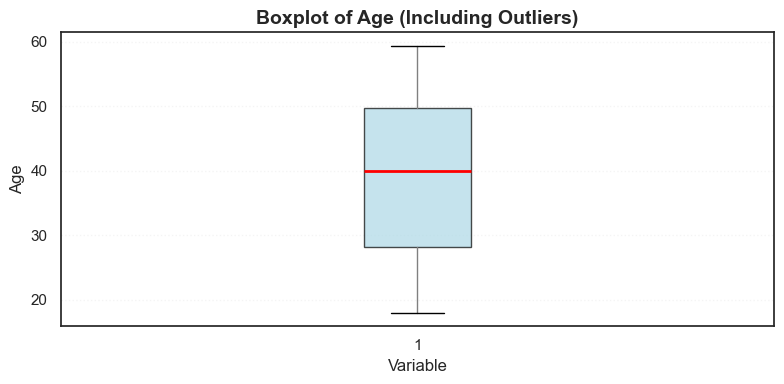

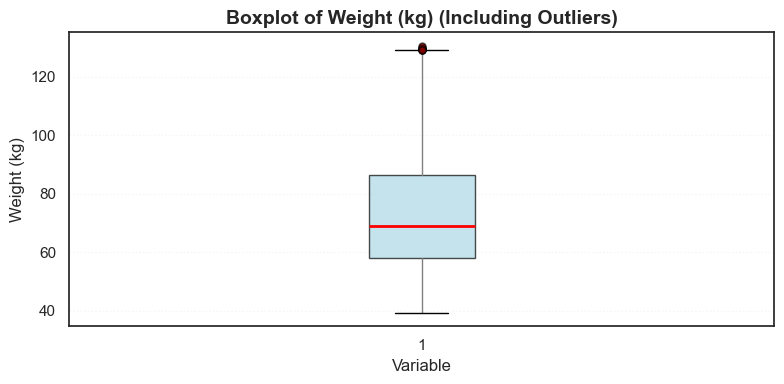

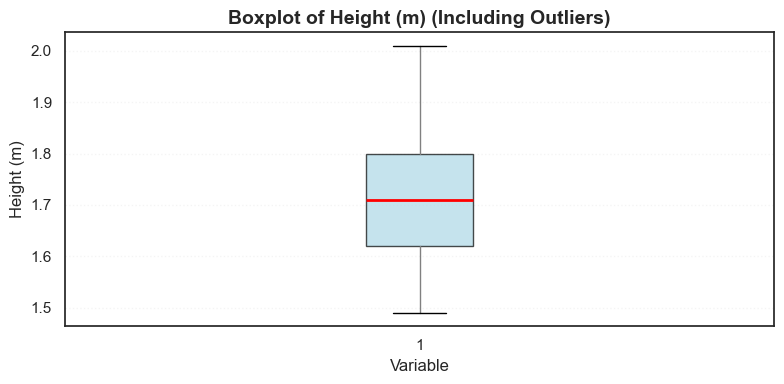

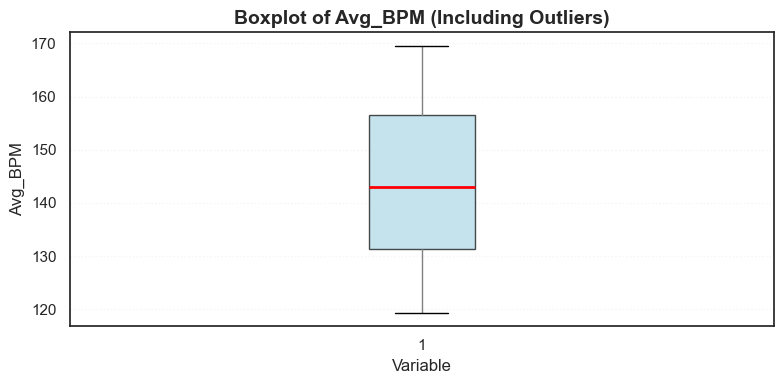

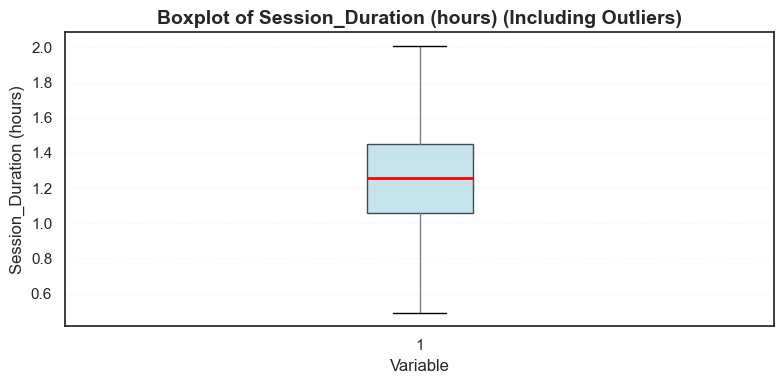

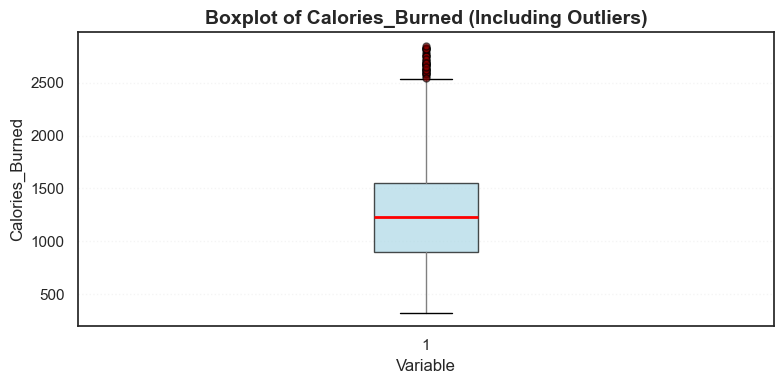

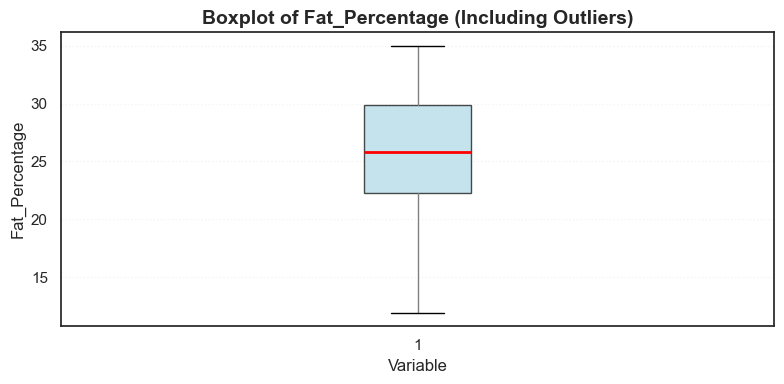

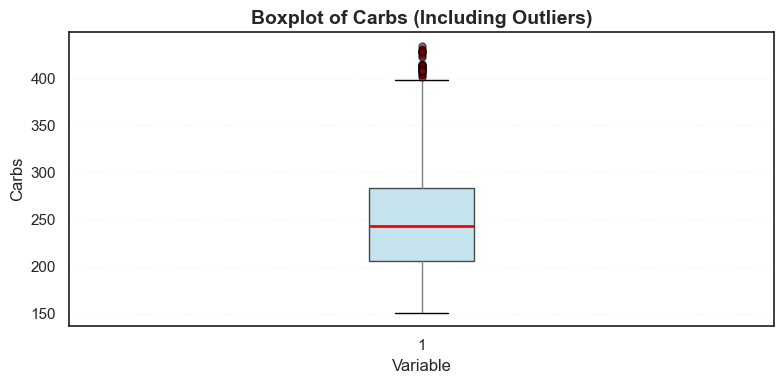

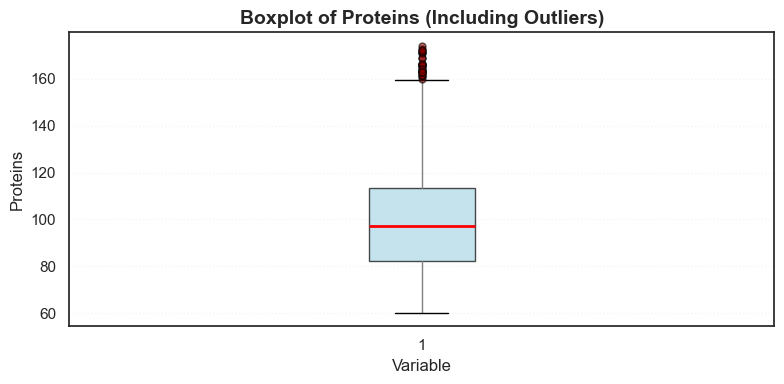

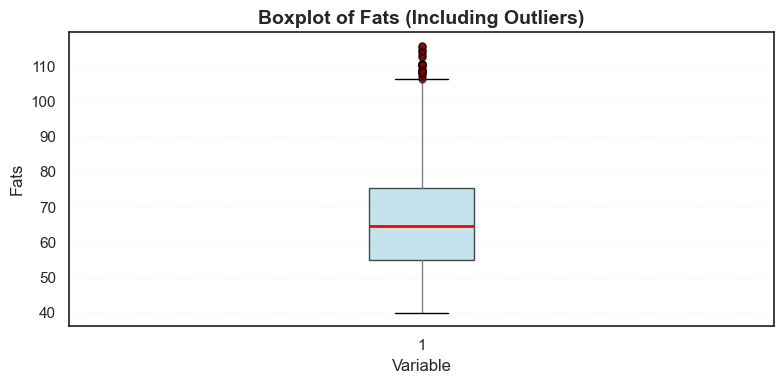

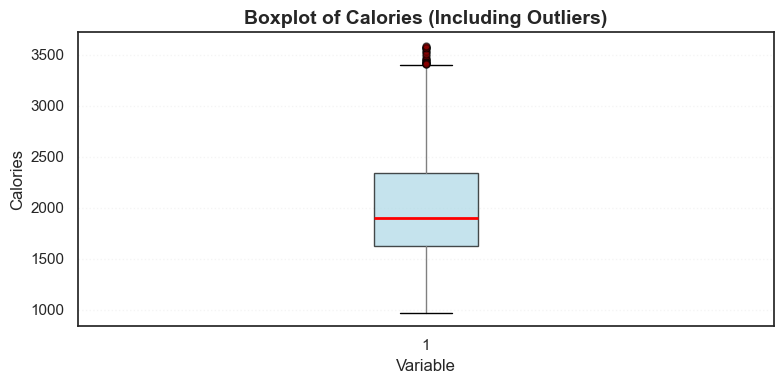

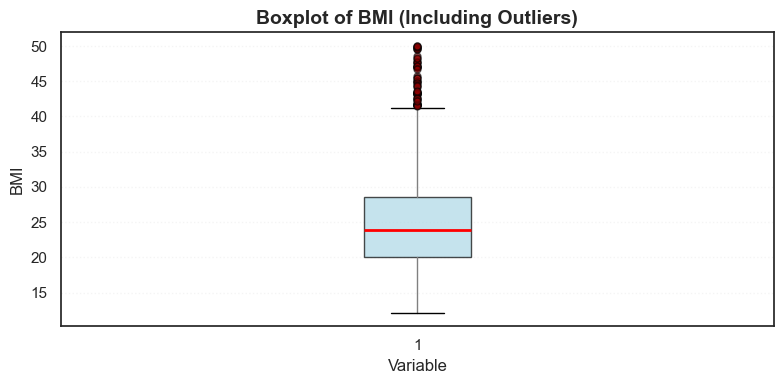

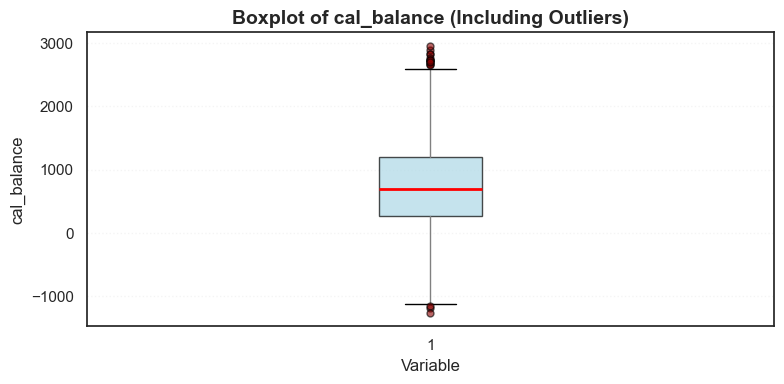

In [23]:
def plot_boxplot_outliers(series, colname):
    plt.figure(figsize=(8, 4))
    plt.boxplot(
        series,
        vert=True,
        patch_artist=True,
        showfliers=True,
        medianprops=dict(color='red', linewidth=2),
        boxprops=dict(facecolor='lightblue', alpha=0.7),
        whiskerprops=dict(color='gray'),
        flierprops=dict(marker='o', markersize=5, markerfacecolor='darkred', alpha=0.6)
    )

    plt.title(f"Boxplot of {colname} (Including Outliers)", fontsize=14, fontweight='bold')
    plt.ylabel(colname, fontsize=12)
    plt.xlabel("Variable", fontsize=12)

    plt.grid(axis='y', linestyle='-', alpha=0.4)
    plt.grid(axis='y', linestyle=':', alpha=0.2)

    plt.tight_layout()
    plt.show()

for col in data.select_dtypes(include=[np.number]).columns:
    plot_boxplot_outliers(data[col], col)


**Penjelasan:**

Kami menentukan outlier pada data tersebut dengan menggunakan metode IQR dan visualisasi boxplot. Pengecekan outlier dengan menggunakan metode IQR dilakukan dengan menentukan batas atas dan batas bawah suatu data yang dihitung berdasarkan kuartil. Rumusnya:

$$
\text{Batas Atas} = Q3 + 1.5 \times IQR
$$

$$
\text{Batas Bawah} = Q1 - 1.5 \times IQR
$$


Setelah kita menghitung batas bawah dan batas atas untuk setiap data numerik, kita dapat menentukan outlier pada data tersebut, yaitu data yang nilainya lebih dari batas atas atau kurang dari batas bawah.


$$
\text{Outlier} = \text{value} > \text{Batas Atas}
$$

$$
\text{atau}
$$

$$
\text{Outlier} = \text{value} < \text{Batas Bawah}
$$

Metode pengecekan outlier menggunakan IQR ini digunakan karena metode ini dapat lebih mudah untuk mengecek outlier pada data yang relatif tidak berdistribusi normal. Tidak seperti metode Z-Score yang lebih cocok digunakan pada data yang berdistribusi normal, metode IQR ini lebih baik dalam mendeteksi outlier pada data yang relatif skew. Tidak semua data numerik pada kolom dataset tersebut berdistribusi normal, beberapa kolom data pada dataset tersebut relatif cenderung skew. Hal ini dapat dilihat dari statistik deskriptif pada jawaban soal nomor 1 yang menunjukkan beberapa data memiliki nilai skewness lebih dari 0,5 atau kurang dari -0,5. Selain itu, kemiringan data juga dapat dilihat dari visualisasi distribusi data pada jawaban soal nomor 3. Oleh karena itu, kami memilih metode pengecekan outlier menggunakan metode IQR karena lebih cocok untuk data yang skew dan cenderung lebih robust dibandingkan metode Z-Score.

Nah, dari metode tersebut, dapat dilihat bahwa pada kolom Age, Height, Avg_BPM, Session_Duration, Fat Percentage tidak ditemukan outlier. Sementara untuk kolom sisanya memiliki outlier. Pada kolom Weight, ditemukan 10 outlier yang nilainya lebih dari batas atas data pada kolom tersebut (129,13). Kemudian, pada kolom Calories_Burned, ditemukan 35 outlier yang nilainya > batas atas (2540,68). Pada kolom Carbs, ditemukan 28 outlier yang nilainya melebihi batas atas (399,52). Pada kolom Proteins, ditemukan 28 outlier yang nilainya > batas atas data (159,92). Juga terdapat 28 outlier pada kolom Fats yang nilainya melebihi batas atas data pada kolom tersebut (106,33). Sementara pada kolom Calories, terdapat 17 outlier yang nilainya lebih dari 3414,25 yang merupakan batas atas dari kolom tersebut. Pada kolom BMI, ditemukan 51 outlier yang nilainya lebih dari 41,41 (batas atas). Terakhir, pada kolom cal_balance, terdapat 17 outlier di mana 3 outlier memiliki nilai < -1139,57 (batas bawah) dan sisanya memiliki nilai > 2606,12 yang merupakan batas atas pada kolom data tersebut.

Outlier pada data tersebut semakin jelas terlihat setelah dilakukan visualisasi boxplot. Sumbu y pada visualisasi boxplot tersebut menunjukkan rentang nilai data pada kolom tersebut. Sementara, garis merah pada boxplot menunjukkan median data pada kolom tersebut. Garis hitam yang berada di atas dan di bawah boxplot menunjukkan batas atas dan batas bawah untuk menentukan outlier pada data tersebut. Kemudian lingkaran merah yang ada di atas batas atas atau di bawah batas bawah menunjukkan outlier pada data. Dapat dilihat dari visualisasi boxplot tersebut, terdapat beberapa lingkaran merah di atas batas atas untuk data pada kolom Weight, Calories_Burned, Carbs, Proteins, Fats, Calories, BMI, dan cal_balance. Selain itu, juga terdapat beberapa lingkaran merah di bawah batas bawah untuk kolom cal_balance yang menunjukkan outlier pada data tersebut. Visualisasi ini menunjukkan hasil yang sama dengan pengecekan outlier menggunakan metode IQR di atas.

#### 2. 3 Penanganan Outlier

**Penjelasan**

Kami menggunakan metode capping untuk menangani outlier pada dataset tersebut. Metode capping yang kami gunakan, yaitu dengan mengubah nilai outlier pada dataset tersebut ke batas atas atau batas bawah pada dataset tersebut. Jika outlier memiliki nilai lebih dari batas atas pada suatu kolom data, maka nilainya akan diubah menjadi sama dengan batas atas data tersebut, begitu pun jika suatu outlier nilainya kurang dari batas bawah suatu data, maka akan ditangani dengan mengganti nilainya menjadi sama dengan batas bawah data tersebut. 

Metode ini kami gunakan karena kami merasa outlier yang terdapat pada dataset tersebut masih memiliki nilai yang wajar dan masuk akal. Outlier tersebut terjadi bukan karena adanya kesalahan dalam penulisan data yang menyebabkan nilai datanya menjadi tidak masuk akal. Sehingga, outlier tersebut tidak perlu untuk dihapus. Karena, jika dihapus, akan memengaruhi jumlah ukuran sampel pada data tersebut. Jika dilakukan deletion pada baris data yang memiliki outlier, nantinya akan memengaruhi pengolahan data yang bisa menyebabkan ketidakakuratan dalam melakukan analisis data. Selain itu, mengganti nilai outlier ke batas atas atau batas bawah yang berbasis IQR juga dapat mengurangi distorsi model. Dengan membatasi nilai ekstrem, maka kita dapat mengurangi dampak outlier pada distribusi data. Metode capping ini juga lebih robust dan lebih sesuai diterapkan daripada metode transformation karena data yang relatif skew (tidak berdistribusi normal). Di mana, metode penanganan outlier dengan menggunakan transformasi data lebih cocok diterapkan untuk outlier pada data yang berdistribusi normal.

In [24]:
def capping(series):
    mask, lower_limit, upper_limit, q1, q3,iqr = outlier(series)
    capped = series.copy()

    for i, val in capped.items():
        if val < lower_limit:
            capped.at[i] = lower_limit
        elif val > upper_limit:
            capped.at[i] = upper_limit

    return capped

def print_capping(series, colname):
    # before capping
    mask_before, _, _, _, _, _ = outlier(series)
    outlier_before = np.sum(mask_before)

    # capping process
    capped = capping(series)

    # after capping
    mask_after, _, _, _, _, _ = outlier(capped)
    outlier_after = np.sum(mask_after)

    print(f"=== capping {colname} ===")
    print("before:")
    print(f"min = {series.min():.3f}, max = {series.max():.3f}")
    print(f"jumlah outlier = {outlier_before}")

    print("after:")
    print(f"min = {capped.min():.3f}, max = {capped.max():.3f}")
    print(f"jumlah outlier = {outlier_after}")

for col in data.select_dtypes(include=[np.number]).columns:
    print_capping(data[col], col)
    print("\n")


def save_capped_data(df, filename):
    df_clean = df.copy()
    
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    

    for col in numeric_cols:
        df_clean[col] = capping(df_clean[col])
        
    df_clean.to_csv(filename, index=False)
    print(f"File tersimpan sebagai: {filename}")
    
    return df_clean

save_capped_data(data, filename='Life-Style_Cleaned.csv')

for col in data.select_dtypes(include=[np.number]).columns:
    print_capping(data[col], col)
    print("\n")


=== capping Age ===
before:
min = 18.000, max = 59.410
jumlah outlier = 0
after:
min = 18.000, max = 59.410
jumlah outlier = 0


=== capping Weight (kg) ===
before:
min = 39.320, max = 130.550
jumlah outlier = 10
after:
min = 39.320, max = 129.125
jumlah outlier = 0


=== capping Height (m) ===
before:
min = 1.490, max = 2.010
jumlah outlier = 0
after:
min = 1.490, max = 2.010
jumlah outlier = 0


=== capping Avg_BPM ===
before:
min = 119.350, max = 169.560
jumlah outlier = 0
after:
min = 119.350, max = 169.560
jumlah outlier = 0


=== capping Session_Duration (hours) ===
before:
min = 0.490, max = 2.010
jumlah outlier = 0
after:
min = 0.490, max = 2.010
jumlah outlier = 0


=== capping Calories_Burned ===
before:
min = 323.990, max = 2850.080
jumlah outlier = 35
after:
min = 323.990, max = 2540.676
jumlah outlier = 0


=== capping Fat_Percentage ===
before:
min = 11.927, max = 35.000
jumlah outlier = 0
after:
min = 11.927, max = 35.000
jumlah outlier = 0


=== capping Carbs ===
before

## **Nomor 3**
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika kategorikal dengan histogram.

#### 3.1 Kolom Age

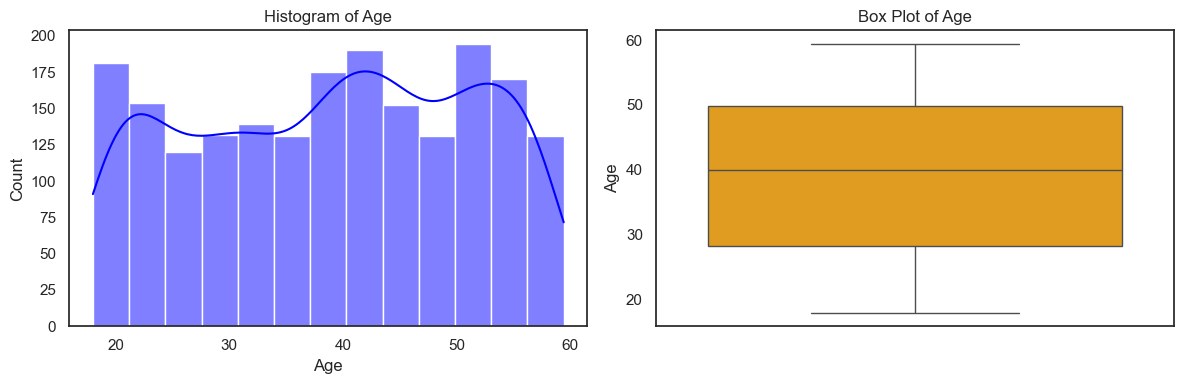

In [25]:
cleandata = pd.read_csv('Life-Style_Cleaned.csv')

sns.set_theme(style="white")

numerical_cols = cleandata.select_dtypes(include=[np.number]).columns
categorical_cols = cleandata.select_dtypes(include=['object', 'category']).columns

def plot_numerical(col_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram
    sns.histplot(cleandata[col_name], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Histogram of {col_name}')
    
    # Boxplot
    sns.boxplot(y=cleandata[col_name], ax=axes[1], color='orange')
    axes[1].set_title(f'Box Plot of {col_name}')
    
    plt.tight_layout()
    #plt.savefig(f'{col_name}_plot.png')
    plt.show()

def plot_categorical(col_name):
    plt.figure(figsize=(8, 4))
    
    # Countplot (Histogram for categorical)
    sns.countplot(x=cleandata[col_name], hue=cleandata[col_name], palette='viridis', legend=False)
    plt.title(f'Distribution of {col_name}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    #plt.savefig(f'{col_name}_plot.png')
    plt.show()

#for col in numerical_cols:
plot_numerical(numerical_cols[0])



Age (Umur)

- Distribusi: Relatif simetris (Skewness -0.11), cenderung menyebar rata (uniform) di rentang 20-60 tahun.
- Box Plot: Median berada di tengah, tidak terlihat outlier yang signifikan. Data tersebar merata.

#### 3.2 Kolom Weight


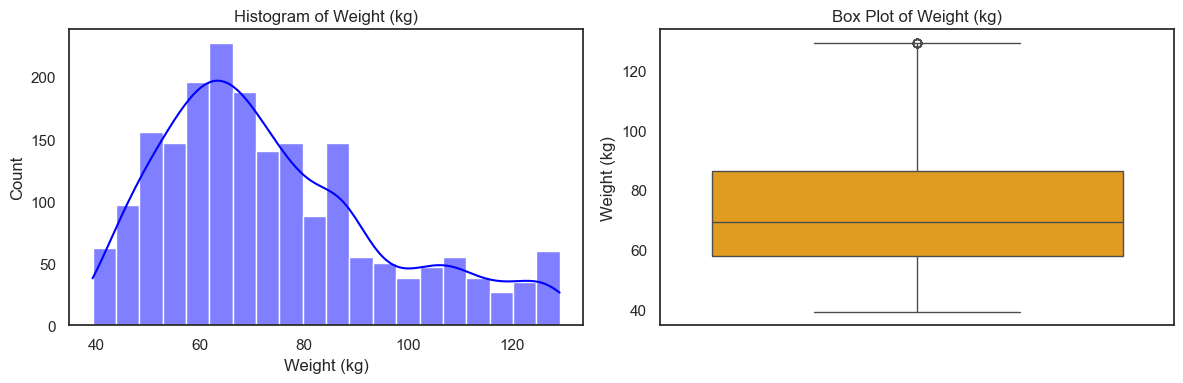

In [26]:
plot_numerical(numerical_cols[1])

Weight (Berat Badan)

- Distribusi: Right-skewed (Menceng ke kanan, Skewness 0.80). Puncak data berada di berat badan yang lebih rendah (sekitar 50-70 kg), dengan ekor memanjang ke arah berat badan yang lebih besar.
- Box Plot: Terdapat beberapa outlier di nilai atas (berat badan > 110 kg).

#### 3.3 Kolom Height

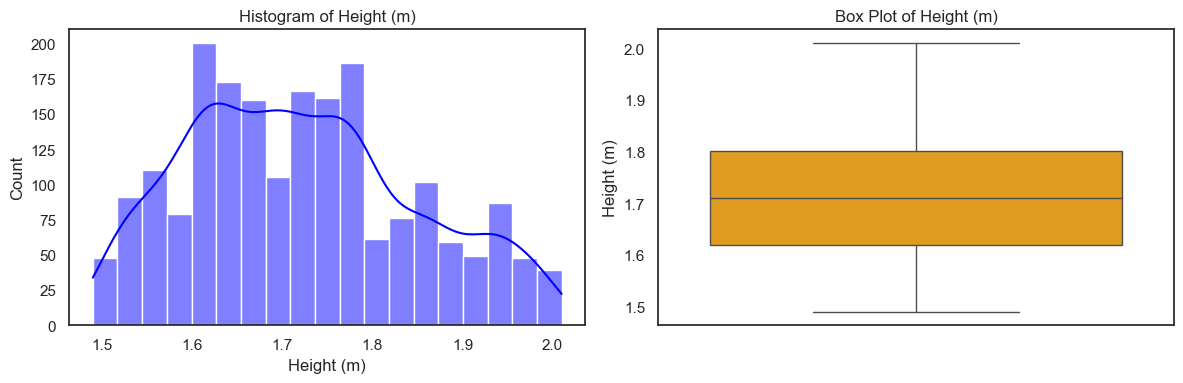

In [27]:
plot_numerical(numerical_cols[2])

Height (Tinggi Badan)

- Distribusi: Cukup normal (Hampir berbentuk lonceng), sedikit menceng kanan (Skewness 0.33).
- Box Plot: Sebaran data terpusat di sekitar 1.7 meter. Sangat sedikit outlier.

#### 3.4 Kolom AVG_BPM

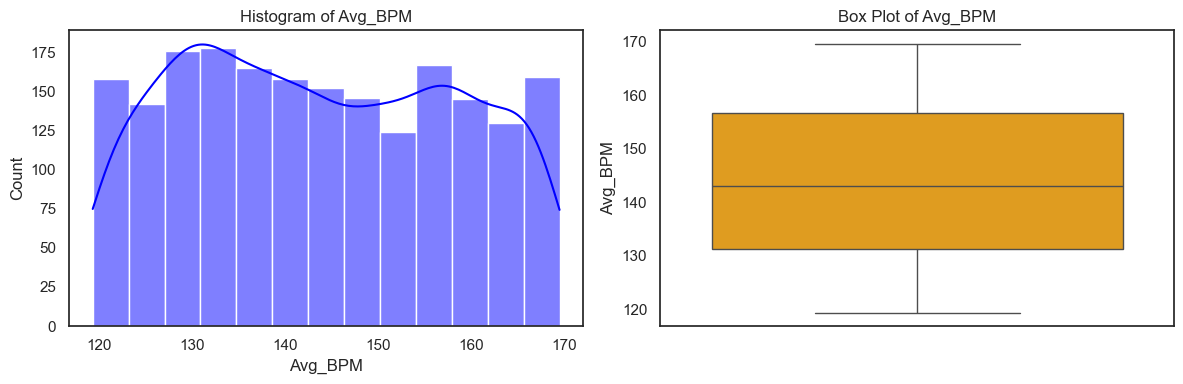

In [28]:
plot_numerical(numerical_cols[3])

Avg_BPM (Detak Jantung Rata-rata)

- Distribusi: Simetris sempurna (Skewness 0.08). Bentuknya menyerupai distribusi normal (kurva lonceng).
- Box Plot: Median tepat di tengah box, bagian kiri dan kanan hampir seimbang.

#### 3.5 Session_Duration

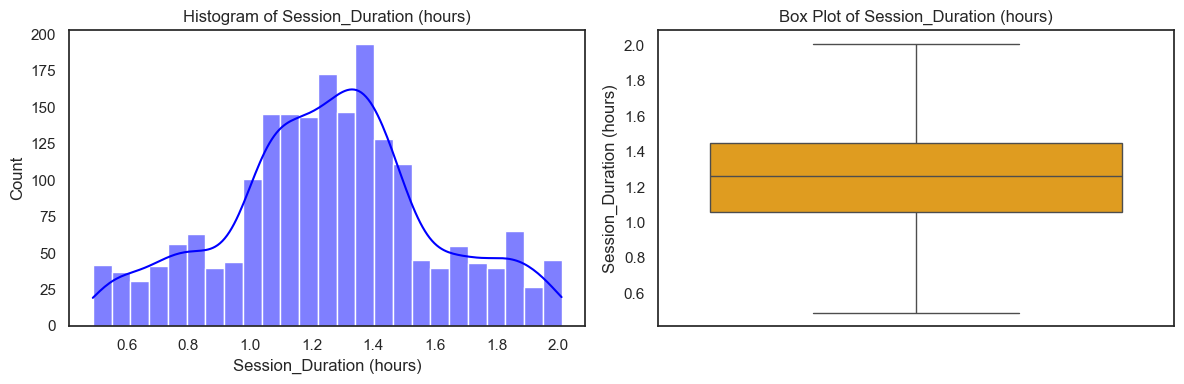

In [29]:
plot_numerical(numerical_cols[4])

Session_Duration (Durasi Latihan)

- Distribusi: Sangat simetris (Skewness -0.01). Data terpusat di sekitar 1.25 jam.
- Box Plot: Tidak ada outlier, sebaran data sangat konsisten.

#### 3.6 Kolom Calories_Burned

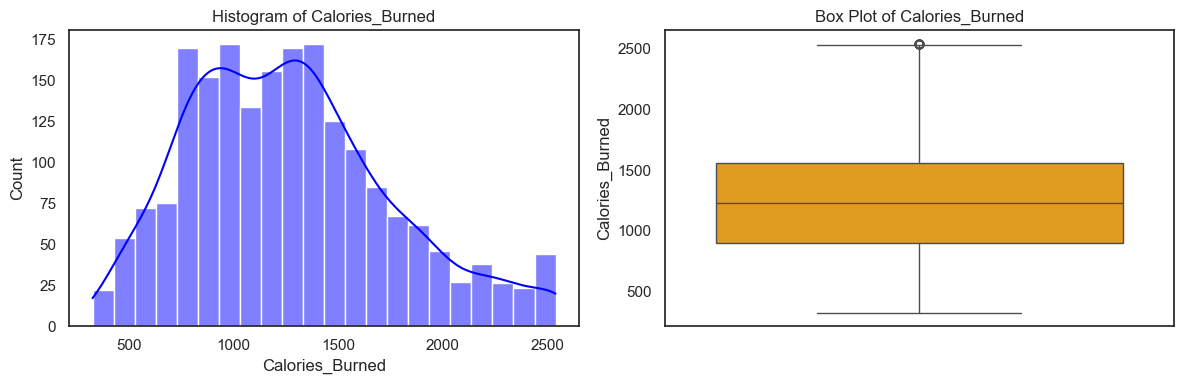

In [30]:
plot_numerical(numerical_cols[5])

Calories_Burned (Kalori Terbakar)

- Distribusi: Right-skewed (Menceng ke kanan, Skewness 0.64). Mayoritas data berkumpul di angka 800-1500 kalori, namun ada sesi latihan yang membakar kalori sangat tinggi.
- Box Plot: Terdapat indikasi outlier pada nilai kalori yang sangat tinggi (> 2500).

#### 3.7 Kolom Fat_Percentage

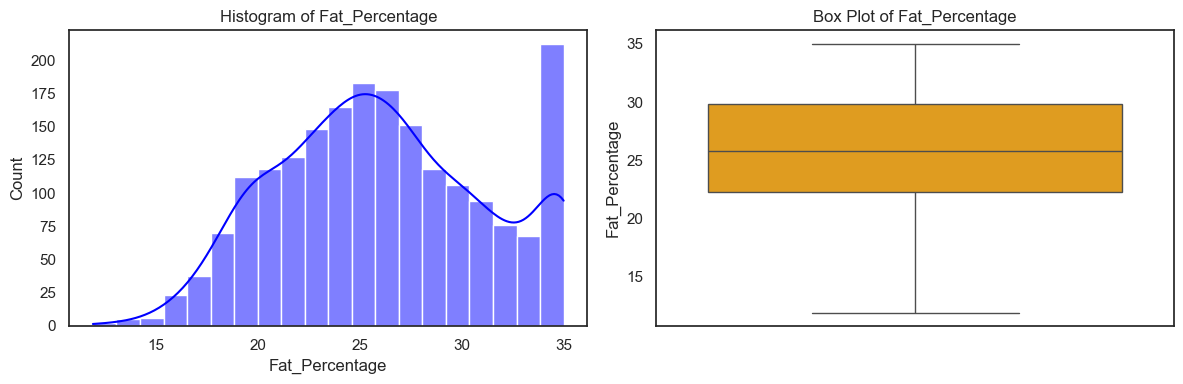

In [31]:
plot_numerical(numerical_cols[6])

Fat_Percentage (Persentase Lemak)

- Distribusi: Relatif simetris dan merata (Skewness 0.10).
- Box Plot: Sebaran data dari ~12% hingga 35% cukup merata tanpa outlier ekstrim.

#### 3.8 Kolom Carbs

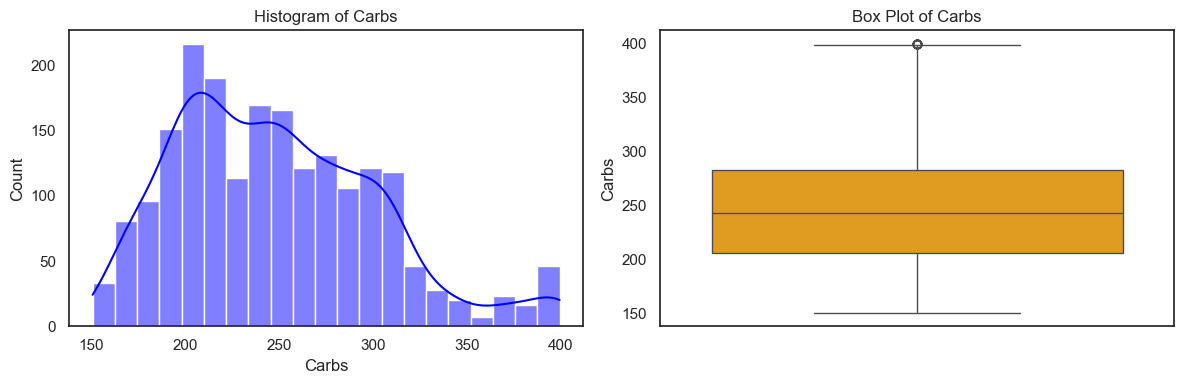

In [32]:
plot_numerical(numerical_cols[7])

Carbs

- Distribusi: Right-skewed denga nilai sekitar 0.7. Hal ini karena nutrisi biasanya memiliki batas bawah minimum namun bisa sangat tinggi pada beberapa individu
- Box Plot: Memiliki outlier pada bagian atas

#### 3.9 Kolom Proteins

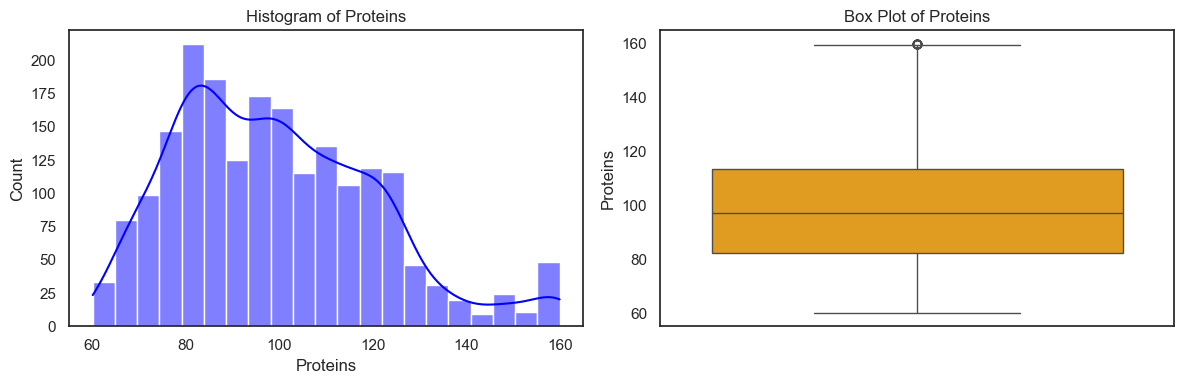

In [33]:
plot_numerical(numerical_cols[8])

Proteins

- Distribusi: Right-skewed seperti kolom carbs. Hal ini karena nutrisi memiliki batas bawah minimum namun bisa sangat tinggi pada beberapa individu
- Box Plot: Memiliki outlier pada bagian atas

#### 3.10 Kolom Fats

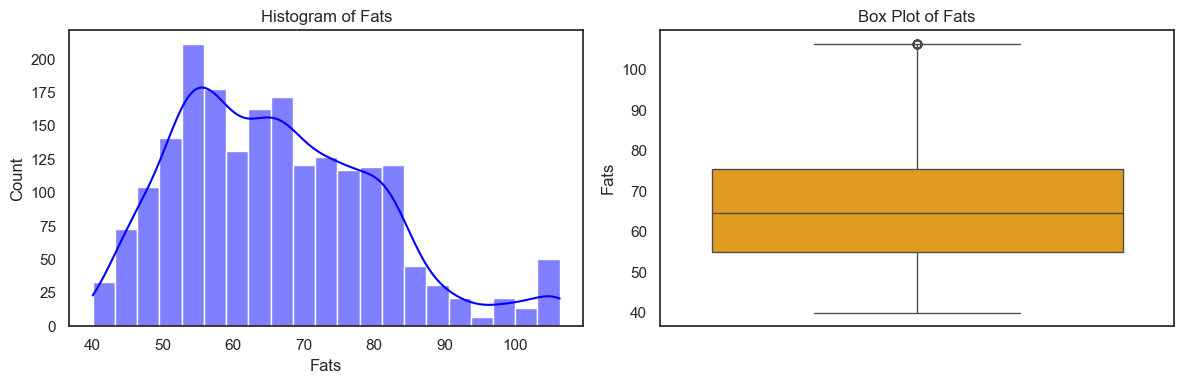

In [34]:
plot_numerical(numerical_cols[9])

Fats

- Distribusi: Right-skewed seperti kolom carbs dan protein. Nutrisi memiliki batas bawah minimum namun bisa sangat tinggi pada beberapa individu. hampir tidak ada perbedaan dengan carbs dan proteins secara visual
- Box Plot: Memiliki outlier pada bagian atas

#### 3.11 Kolom Calories

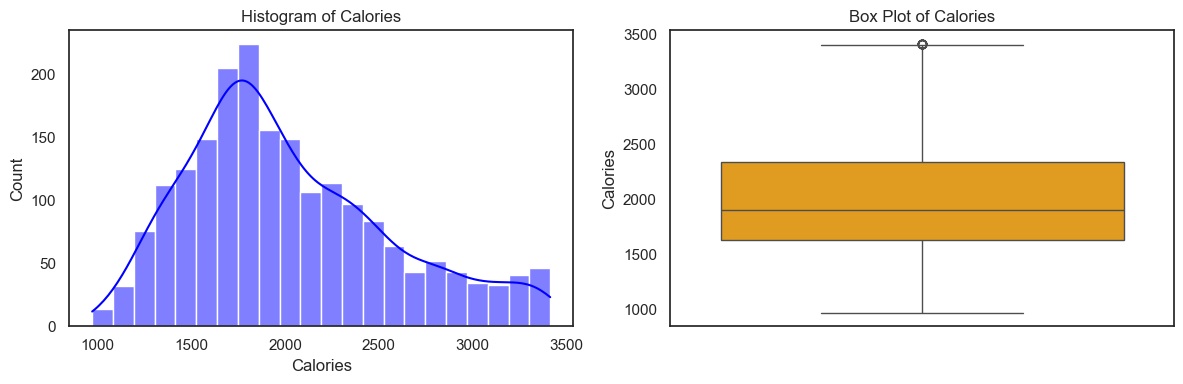

In [35]:
plot_numerical(numerical_cols[10])

Calories

- Distribusi: Bertipe Right-skewed. Mempunyai distribusi yang halus seperti normal(tidak memilki banyak bukit).
- Box Plot: Memiliki beberapa outlier di angka >3500

#### 3.12 Kolom BMI

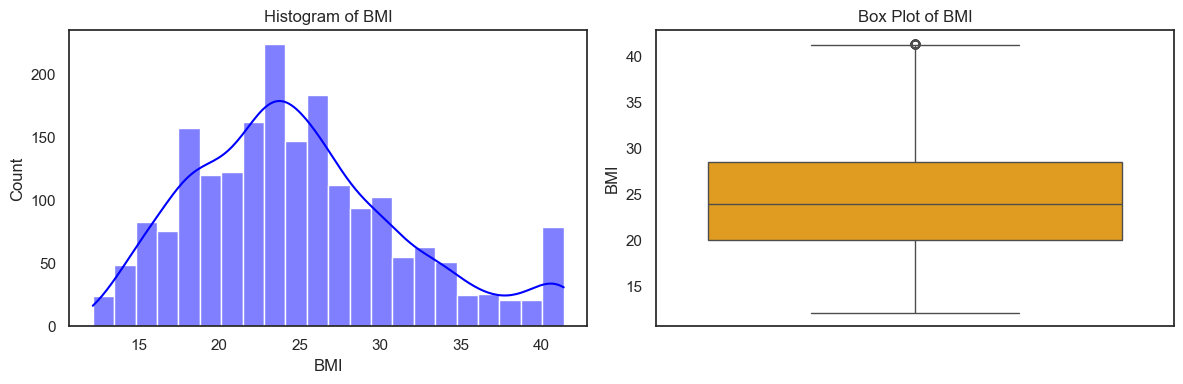

In [36]:
plot_numerical(numerical_cols[11])

BMI (Body Mass Index)

- Distribusi: Right-skewed (Skewness 0.83), mirip dengan pola Berat Badan. Mayoritas sampel memiliki BMI di kisaran normal hingga overweight ringan, tapi ada ekor panjang ke arah obesitas.

- Box Plot: Terdapat outlier jelas di nilai BMI tinggi (> 40).

#### 3.13 Kolom cal_balance

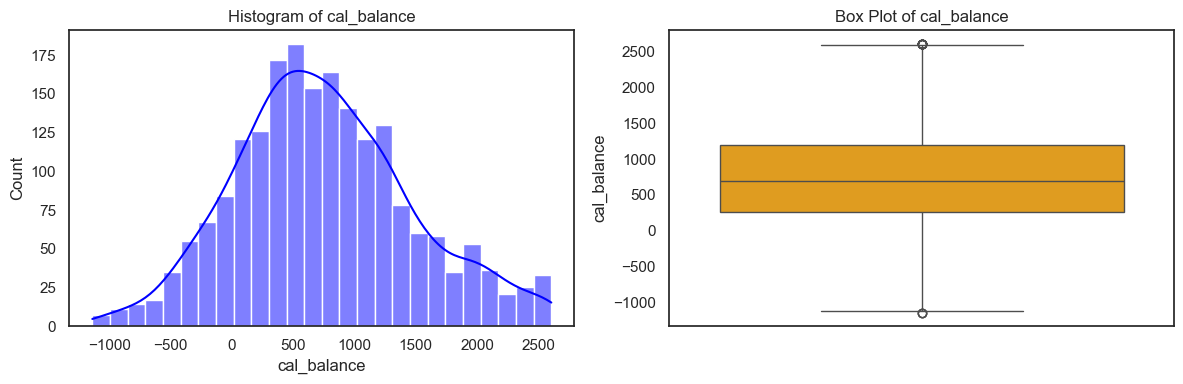

In [37]:
plot_numerical(numerical_cols[12])

cal_balance (Keseimbangan Kalori)

- Distribusi: Agak menceng ke kanan (Skewness 0.32), namun masih mendekati - normal.

- Box Plot: Sebaran cukup lebar, menunjukkan variasi besar dalam surplus/defisit kalori antar individu.

#### 3.14 Kolom Gender

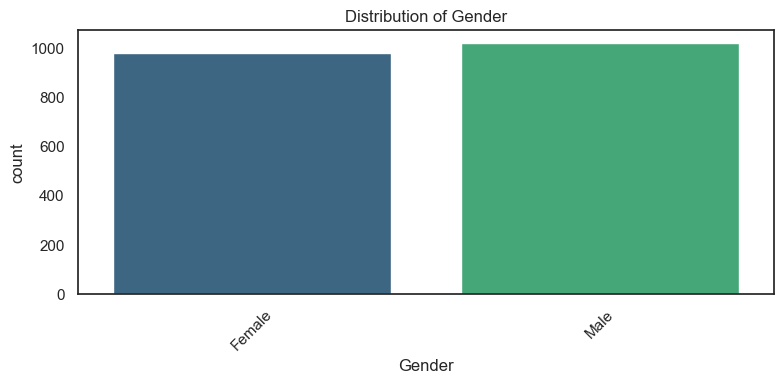

In [38]:
plot_categorical(categorical_cols[0])

Gender (Jenis Kelamin)

- Kondisi: Sangat seimbang (Balanced).

- Visual: Tinggi batang untuk 'Male' dan 'Female' hampir sejajar (51% vs 49%). Tidak ada dominasi satu gender.

#### 3.15 Kolom Workout_Type

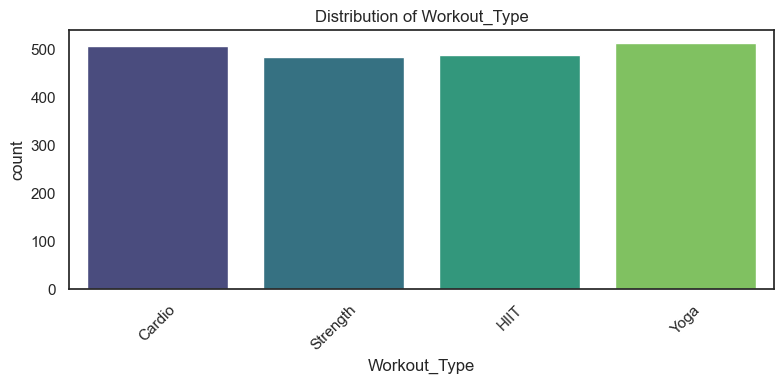

In [39]:
plot_categorical(categorical_cols[1])

Workout_Type (Jenis Latihan)

- Kondisi: Distribusi seragam (Uniform).

- Visual: Keempat kategori (Yoga, Cardio, HIIT, Strength) memiliki jumlah frekuensi yang hampir sama persis (sekitar 24-25% masing-masing). Ini menunjukkan pengambilan sampel data dilakukan secara merata untuk tiap jenis olahraga.

#### 3.16 Kolom diet_type

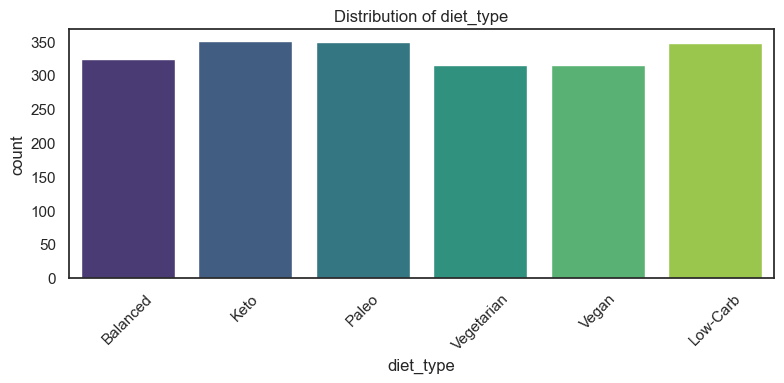

In [40]:
plot_categorical(categorical_cols[2])

diet_type (Jenis Diet)

- Kondisi: Distribusi seragam (Uniform).

- Visual: Keenam jenis diet (Keto, Paleo, Low-Carb, Balanced, Vegetarian, Vegan) memiliki proporsi yang sangat mirip (sekitar 15-17% masing-masing). Tidak ada jenis diet yang mendominasi populasi dataset ini.

## **Nomor 4**
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram. Apakah kolom tersebut berdistribusi normal? Jika bukan, terdistribusi seperti apa kolom tersebut?

In [41]:
def print_skew(series):
    print(f"Statistik Distribusi {series.name}")
    modus_result = modus(series)
    formatted = ", ".join(f"{m:.3f}" for m in modus_result)
    print(f"Modus: {formatted}")
    print(f"Mean = {mean(series):.3f}")
    print(f"Median = {median(series):.3f}")
    print(f"Skewness = {skewness(series):.3f}")
    print(f"Kurtosis = {kurtosis(series):.3f}")

for col in data.select_dtypes(include=[np.number]).columns:
    print_skew(data[col])
    print("\n")


Statistik Distribusi Age
Modus: 18.000
Mean = 38.939
Median = 39.915
Skewness = -0.113
Kurtosis = -1.194


Statistik Distribusi Weight (kg)
Modus: 88.130
Mean = 73.820
Median = 69.150
Skewness = 0.798
Kurtosis = -0.043


Statistik Distribusi Height (m)
Modus: 1.680
Mean = 1.721
Median = 1.710
Skewness = 0.330
Kurtosis = -0.707


Statistik Distribusi Avg_BPM
Modus: 149.800, 120.140, 131.000, 166.910, 123.120, 138.960
Mean = 143.862
Median = 143.070
Skewness = 0.084
Kurtosis = -1.209


Statistik Distribusi Session_Duration (hours)
Modus: 1.260
Mean = 1.256
Median = 1.260
Skewness = -0.012
Kurtosis = -0.251


Statistik Distribusi Calories_Burned
Modus: 1248.000
Mean = 1269.781
Median = 1226.145
Skewness = 0.641
Kurtosis = 0.172


Statistik Distribusi Fat_Percentage
Modus: 35.000
Mean = 26.098
Median = 25.777
Skewness = 0.101
Kurtosis = -0.770


Statistik Distribusi Carbs
Modus: 200.150, 208.230, 204.510
Mean = 248.456
Median = 242.900
Skewness = 0.713
Kurtosis = 0.362


Statistik Distribu

**Penjelasan:**

Pada data berdistribusi normal, sebagian besar nilainya akan berada di mean atau rata-ratanya dan visualisasinya akan berbentuk seperti lonceng atau bukit. Selain itu, data yang berdsitribusi normal cenderung memiliki nilai modus, median, dan mean yang sama. Jika dilihat dari kemiringannya, data berdistribusi normal cenderung simetris (tidak miring kiri atau miring kanan). Data berdistribusi normal secara persebaran datanya juga tidak terlalu datar atau landai, namun juga tidak terlalu runcing. Berdasarkan hasil visualisasi plot distribusi dengan menggunakan histogram dan boxplot untuk setiap data numerik, maka kita dapat menentukan distribusi suatu kolom sebagai berikut:

### 1. Age

Dilihat dari kemiringannya, persebaran data pada kolom Age ini cenderung simetris. Tidak terdapat data yang cenderung menumpuk di kiri atau di kanan data. Namun, jika dilihat dari kurtosisnya, persebaran data pada kolom Age cenderung merata pada setiap nilainya. Hal ini terlihat dari visualisasi histogram datanya yang cenderung datar, sehingga data ini tidak berdistribusi normal, melainkan platykurtic (datar). Pernyataan ini juga didukung oleh statistik data pada output kode di atas. Di mana, nilai kurtosis datanya = -1,19 yang menunjukkan data tidak berdistribusi normal (kurtosis = 0).

### 2. Weight
Visualisasi histogram untuk data pada kolom Weight menunjukkan adanya ketidakmerataan distribusi data. Berdasarkan visualisasi tersebut, dapat disimpulkan bahwa data menumpuk di bagian kiri yang menyebabkan data memiliki ekor yang panjang di bagian kanan. Karena itulah, data untuk kolom Weight ini tidak berdistribusi normal dan disebut sebagai data yang positive skew, yaitu data yang ekornya panjang di sebelah kanan. Hal ini ditunjukkan juga dari nilai skewnessnya yang sama dengan 0,79 yang menunjukkan bahwa data memang positive skew.

### 3. Height
Berdasarkan visualisasi histogramnya untuk kolom data Height, distribusi data pada kolom data Height cenderung menumpuk di bagian tengah data. Namun, jika dilihat lebih seksama, data pada kolom Height ini seperti memiliki dua atau lebih puncak data. Hal ini terlihat dari persebaran data yang kurang lebih sama pada nilai data = 1,6 dan di rentang 1,7 - 1,8. Berdasarkan statistiknya, nilai kurtosis untuk data Height = -0,71 (kurang dari -0,5) yang menunjukkan kalau data memiliki persebaran yang hampir datar (puncak banyak). Oleh karena itu, data pada kolom Height bukan merupakan data berdistribusi normal, melainkan platykurtic atau bimodal.

### 4. Avg_BPM
Apabila dilihat dari visualisasi histogramnya, data pada kolom Avg_BPM bukan merupakan data berdistribusi normal. Hal ini dikarenakan data tidak berbentuk seperti lonceng atau bukit yang persebaran datanya sebagian besar menumpuk di daerah mean atau median. Dapat dilihat dari visualisasi tersebut, persebaran data pada kolom Avg_BPM cenderung merata pada setiap nilainya, sehingga disebut sebagai data yang platykurtic (datar). Hal ini juga didukung oleh statistik distribusi datanya yang menunjukkan nilai kurtosisnya = -1,21 (kurang dari -0,5 sehingga dapat dianggap bahwa data platykurtic).

### 5. Session_Duration
Berdasarkan visualisasi histogramnya, data untuk kolom Session_Duration dapat dikategorikan sebagai data yang berdistribusi normal. Hal ini ditunjukkan dengan persebaran datanya yang menumpuk di tengah atau median. Kemudian, dilihat dari statistik deskriptifnya, nilai modus, mean, dan mediannya kurang lebih sama yaitu bernilai 1,26 yang menunjukkan data terdistribusi normal. Selain itu, panjang ekor kanan dan kiri datanya juga sama yang menunjukkan data simetris (tidak condong kanan atau kiri). 

### 6. Calories_Burned
Visualisasi histogram untuk data pada kolom Calories_Burned menunjukkan kalau sebagian besar data menumpuk di bagian kiri data. Dapat dilihat dari visualisasi tersebut, data menumpuk pada rentang nilai 1000 - 1500, menyebabkan ekor sebelah kanannya menjadi lebih panjang. Karena datanya tidak simetris, maka data tidak dapat dikategorikan sebagai data yang berdistribusi normal, melainkan datanya relatif positive skew. Berdasarkan statistiknya, nilai skewness untuk data pada kolom Calories_Burned adalah 0,64 (lebih dari 0,5) yang menunjukkan kalau data lebih condong ke kanan (memiliki ekor yang panjang di kanan).

### 7. Fat_Percentage
Jika dilihat dari visualisasi histogramnya, sebagian besar data pada kolom Fat_Percentage terkumpul di bagian tengah data. Hal ini ditunjukkan dengan bentuk datanya yang seperti lonceng (bell shaped). Namun, jika dilihat dari puncak datanya, data pada kolom Fat_Percentage ini memiliki lebih dari satu puncak. Dari visualisasi tersebut dapat dilihat, bahwa terdapat puncak lain pada data yang nilainya = 35. Hal ini juga didukung dari statistiknya yang menyatakan bahwa modusnya memiliki nilai = 35, sementara mean dan mediannya berada di rentang 25-26. Berdasarkan pernyataan tersebut, data pada kolom Fat_Percentage tidak dapat dikatakan berdistribusi normal, melainkan berdistribusi bimodal (memiliki dua puncak).

### 8. Carbs
Pada data untuk kolom Carbs ini, sebagian besar datanya terlihat menumpuk di sisi kiri data. Pada rentang nilai 200 - 250, jumlah frekuensi datanya cukup tinggi jika dibandingkan dengan bagian kanannya (rentang nilai data > 300). Hal ini menunjukkan bahwa data tidak berdistribusi normal, namun positive skew. Hal ini didukung dari statistiknya yang menyatakan nilai skewness data tersebut = 0.71 (lebih dari 0,5), sehingga data dapat dikatakan positive skew (tidak simetris).

### 9. Proteins
Salah satu syarat sebuah data dikatakan berdistribusi normal adalah jika data tersebut memiliki persebaran data yang simetris, dengan puncak datanya berada di tengah. Pada visualisasi histogram untuk kolom data Proteins, dapat dilihat bahwa persebarannya tidak simetris. Sebagian besar data cenderung menumpuk di sebelah kiri yang menunjukkan kalau data tersebut memiliki ekor yang lebih panjang di kanan (miring ke kanan). Oleh karena itu, data pada kolom Proteins dapat disebut sebagai data yang positive skew.

### 10. Fats
Hampir sama seperti kolom data sebelumnya, persebaran data pada kolom Fats juga cenderung tidak simetris. Sebagian besar datanya cenderugn menumpuk di sebelah kiri, menyebabkan sebelah kanannya memiliki ekor yang panjang. Ditinjau dari statistiknya juga, nilai skewness untuk kolom Fats = 0,70, menujukkan kalau datanya memang positive skew (condong ke kanan) dan bukan merupakan data yang terdistribusi normal.

### 11. Calories
Berdasarkan visualisasi histogram untuk data pada kolom Calories, data tersebut dapat dikategorikan sebagai data yang positive skew. Hal ini dikarenakan data tersebut tidak simetris, sehingga tidak dapat dikategorikan sebagai data yang berdistribusi normal. Sebagian besar datanya menumpuk di sebelah kiri. Dilihat dari statistiknya, nilai skewness untuk kolom data tersebut = 0,69, menunjukkan kalau data ini memang skew ke kanan.

### 12. BMI
Visualisasi histogram untuk data pada kolom BMI menunjukkan bahwa data tersebut memiliki satu puncak, yang memenuhi syarat data tersebut berdistribusi normal. Namun, visualisasi histogram data tersebut menunjukkan kalau data tersebut tidak simetri, sehingga data BMI tidak dapat dikatakan sebagai data yang berdistribusi normal. Data tersebut cenderung memiliki ekor yang panjang di sebelah kanan, dengan sebagian besar datanya menumpuk di sebelah kiri. Jika dilihat dari nilai skewnessnya, data tersebut memiliki nilai skewness = 0,82, yang berarti data tersebut tergolong sebagai data yang positive skew.

### 13. cal_balance
Dilihat dari visualisasi histogramnya, data pada kolom cal_balance memiliki satu puncak di tengah. Bentuk distribusi data pada kolom cal_balance menyerupai bentuk lonceng (bell shaped). Selain itu, dilihat dari kemiringan dan kesimetrisannya, data tersebut juga cenderung simetris. Ekor kanan dan kirinya sama, juga tidak terdapat beberapa puncak yang menunjukkan kalau data merupakan data mesokurtic. Ditinjau dari statistiknya, data tersebut memiliki nilai skewness = 0,31 dan nilai kurtosis = -0,02. Keduanya masih di bawah batas wajar (0,5 atau -0,5) sehingga data pada kolom cal_balance dapat dikategorikan sebagai data yang berdistribusi normal.

# Soal Spesifik Dataset

Enam Langkah Testing:

1.  Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Nomor 5 : Hipotesis 1 Sampel

1. Organisasi Kesehatan Dunia (WHO) menyatakan bahwa BMI rata-rata populasi dewasa yang sehat seharusnya tidak melebihi 25. Periksalah apakah rata-rata BMI dari data individu ini kurang dari atau sama dengan 25?
2. Standar detak jantung rata-rata saat berolahraga untuk intensitas sedang adalah 140 BPM. Lembaga riset perlu memastikan apakah data yang dikumpulkan mencerminkan intensitas olahraga yang normal. Periksalah apakah rata-rata detak jantung (Avg_BPM) saat berolahraga bernilai 140 BPM?
3. Dari 500 individu pertama dalam dataset (baris teratas), lembaga ingin memverifikasi apakah rata-rata durasi sesi olahraga berbeda dari 1.3 jam. Periksalah apakah rata-rata Session_Duration dari 500 individu pertama tidak sama dengan 1.3 jam?
4. Menurut standar kesehatan, minimal 25% dari populasi seharusnya memiliki surplus kalori (cal_balance positif) untuk menjaga energi harian. Apakah proporsi individu dengan surplus kalori (cal_balance > 0) lebih besar dari 25% dalam dataset keseluruhan?


#### 5.1

In [42]:
bmi = cleandata['BMI']

mu = 25 #rata rata populasi
x = mean(bmi) #rata rata sampel
n = len(bmi) #jumlah sampel
s = std(bmi) #standar deviasi sampel
alpha = 0.05

print("Diketahui:")
print(f"μ = {mu:.3f}")
print(f"x̄ = {x:.3f}")
print(f"n = {n}")
print(f"s = {s:.3f}")
print(f"α = {alpha:.3f}")

# Langkah 1: Menentukan H0
print("\nLangkah 1: Menentukan hipotesis nol")
print(f"H0: μ <= {mu}")

# Langkah 2: Menentukan H1
print("\nLangkah 2: Menentukan hipotesis alternatif")
print(f"H1: μ > {mu}")

# Langkah 3: Menentukan tingkat signifikansi
print("\nLangkah 3: Menentukan tingkat signifikansi")
print(f"α = {alpha:.3f}")

# Langkah 4: Menentukan statistik uji
print("\nLangkah 4: Menentukan statistik uji")
print("Menggunakan uji t one tail karena standar deviasi populasi tidak diketahui")

# Langkah 5: Menghitung statistik
print("\nLangkah 5: Menghitung uji statistik")
print("t = (x̄ - μ) / (s/√n)")
t = (x - mu)/(s/np.sqrt(n))
print(f"t = {t:.3f}")
t_alpha = stats.norm.ppf(1 - alpha) #konstatnta t untuk aplha 0.05
print(f"t_alpha = {t_alpha:.3f}")

# Langkah 6: Ambil Keputusan
print("\nLangkah 6: Ambil Keputusan")
if t > t_alpha:
    print(f"{t:.3f} > {t_alpha:.3f} ")
    print(f"Karena t > t_alpha, maka tolak H0. Jadi, rata-rata BMI populasi lebih dari {mu}.")
else:
    print(f"{t:.3f} <= {t_alpha:.3f} ")
    print(f"Karena t <= t_alpha, maka gagal tolak H0. Jadi, rata-rata BMI populasi tidak lebih dari {mu}.")

Diketahui:
μ = 25.000
x̄ = 24.869
n = 2000
s = 6.607
α = 0.050

Langkah 1: Menentukan hipotesis nol
H0: μ <= 25

Langkah 2: Menentukan hipotesis alternatif
H1: μ > 25

Langkah 3: Menentukan tingkat signifikansi
α = 0.050

Langkah 4: Menentukan statistik uji
Menggunakan uji t one tail karena standar deviasi populasi tidak diketahui

Langkah 5: Menghitung uji statistik
t = (x̄ - μ) / (s/√n)
t = -0.888
t_alpha = 1.645

Langkah 6: Ambil Keputusan
-0.888 <= 1.645 
Karena t <= t_alpha, maka gagal tolak H0. Jadi, rata-rata BMI populasi tidak lebih dari 25.


#### 5.2

In [43]:
BPM = cleandata['Avg_BPM']

mu = 140 #rata rata populasi
x = mean(BPM) #rata rata sampel
n = len(BPM) #jumlah sampel
s = std(BPM) #standar deviasi sampel
alpha = 0.05

print("Diketahui:")
print(f"μ = {mu:.3f}")
print(f"x̄ = {x:.3f}")
print(f"n = {n}")
print(f"s = {s:.3f}")
print(f"α = {alpha:.3f}")

# Langkah 1: Menentukan H0
print("\nLangkah 1: Menentukan hipotesis nol")
print(f"H0: μ = {mu}")

# Langkah 2: Menentukan H1
print("\nLangkah 2: Menentukan hipotesis alternatif")
print(f"H1: μ ≠ {mu}")

# Langkah 3: Menentukan tingkat signifikansi
print("\nLangkah 3: Menentukan tingkat signifikansi")
print(f"α = {alpha:.3f}")

# Langkah 4: Menentukan statistik uji
print("\nLangkah 4: Menentukan statistik uji")
print("Menggunakan uji t two tail karena standar deviasi populasi tidak diketahui")

# Langkah 5: Menghitung statistik
print("\nLangkah 5: Menghitung uji statistik")
print("t = (x̄ - μ) / (s/√n)")
t = (x - mu)/(s/np.sqrt(n))
print(f"t = {t:.3f}")
t_alphaperdua = 1.96 #konstatnta t untuk alpha per dua 0.05
print(f"t_alpha = {t_alphaperdua:.3f}")

# Langkah 6: Ambil Keputusan
print("\nLangkah 6: Ambil Keputusan")
if t != t_alphaperdua:
    print(f"{t:.3f} ≠ {t_alphaperdua:.3f} ")
    print(f"Karena t ≠ t_alphaperdua, maka tolak H0. Jadi, rata-rata BPM jantung tidak sama dengan {mu} BPM.")
else:
    print(f"{t:.3f} = {t_alphaperdua:.3f} ")
    print(f"Karena t = t_alphaperdua, maka gagal tolak H0. Jadi, rata-rata BPM jantung sama dengan {mu} BPM.")

Diketahui:
μ = 140.000
x̄ = 143.862
n = 2000
s = 14.411
α = 0.050

Langkah 1: Menentukan hipotesis nol
H0: μ = 140

Langkah 2: Menentukan hipotesis alternatif
H1: μ ≠ 140

Langkah 3: Menentukan tingkat signifikansi
α = 0.050

Langkah 4: Menentukan statistik uji
Menggunakan uji t two tail karena standar deviasi populasi tidak diketahui

Langkah 5: Menghitung uji statistik
t = (x̄ - μ) / (s/√n)
t = 11.986
t_alpha = 1.960

Langkah 6: Ambil Keputusan
11.986 ≠ 1.960 
Karena t ≠ t_alphaperdua, maka tolak H0. Jadi, rata-rata BPM jantung tidak sama dengan 140 BPM.


#### 5.3

In [44]:
durasi = cleandata['Session_Duration (hours)'].head(500)

mu = 1.3 #rata rata populasi
x = mean(durasi) #rata rata sampel
n = len(durasi) #jumlah sampel
s = std(durasi) #standar deviasi sampel
alpha = 0.05

print("Diketahui:")
print(f"μ = {mu:.3f}")
print(f"x̄ = {x:.3f}")
print(f"n = {n}")
print(f"s = {s:.3f}")
print(f"α = {alpha:.3f}")

# Langkah 1: Menentukan H0
print("\nLangkah 1: Menentukan hipotesis nol")
print(f"H0: μ = {mu}")

# Langkah 2: Menentukan H1
print("\nLangkah 2: Menentukan hipotesis alternatif")
print(f"H1: μ ≠ {mu}")

# Langkah 3: Menentukan tingkat signifikansi
print("\nLangkah 3: Menentukan tingkat signifikansi")
print(f"α = {alpha:.3f}")

# Langkah 4: Menentukan statistik uji
print("\nLangkah 4: Menentukan statistik uji")
print("Menggunakan uji t two tail karena standar deviasi populasi tidak diketahui")

# Langkah 5: Menghitung statistik
print("\nLangkah 5: Menghitung uji statistik")
print("t = (x̄ - μ) / (s/√n)")
t = (x - mu)/(s/np.sqrt(n))
print(f"t = {t:.3f}")
t_alphaperdua = 1.96 #konstatnta t untuk alpha per dua 0.05
print(f"t_alpha = {t_alphaperdua:.3f}")

# Langkah 6: Ambil Keputusan
print("\nLangkah 6: Ambil Keputusan")
if t != t_alphaperdua:
    print(f"{t:.3f} ≠ {t_alphaperdua:.3f} ")
    print(f"Karena t ≠ t_alphaperdua, maka tolak H0. Jadi, rata-rata durasi sesi olahraga tidak sama dengan {mu} jam.")
else:
    print(f"{t:.3f} = {t_alphaperdua:.3f} ")
    print(f"Karena t = t_alphaperdua, maka gagal tolak H0. Jadi, rata-rata durasi sesi olahraga sama dengan {mu} jam.")

Diketahui:
μ = 1.300
x̄ = 1.266
n = 500
s = 0.350
α = 0.050

Langkah 1: Menentukan hipotesis nol
H0: μ = 1.3

Langkah 2: Menentukan hipotesis alternatif
H1: μ ≠ 1.3

Langkah 3: Menentukan tingkat signifikansi
α = 0.050

Langkah 4: Menentukan statistik uji
Menggunakan uji t two tail karena standar deviasi populasi tidak diketahui

Langkah 5: Menghitung uji statistik
t = (x̄ - μ) / (s/√n)
t = -2.168
t_alpha = 1.960

Langkah 6: Ambil Keputusan
-2.168 ≠ 1.960 
Karena t ≠ t_alphaperdua, maka tolak H0. Jadi, rata-rata durasi sesi olahraga tidak sama dengan 1.3 jam.


#### 5.4

In [45]:
cal = cleandata['cal_balance']

p = 0.25 #proporsi populasi
n = len(cal) #jumlah sampel
s = std(cal) #standar deviasi sampel
q = 1 - p 
alpha = 0.05

print("Diketahui:")
print(f"p = {p:.3f}")
print(f"x̄ = {x:.3f}")
print(f"n = {n}")
print(f"s = {s:.3f}")
print(f"q = {q:.3f}")
print(f"α = {alpha:.3f}")

# Langkah 1: Menentukan H0
print("\nLangkah 1: Menentukan hipotesis nol")
print(f"H0: p >= {p}")

# Langkah 2: Menentukan H1
print("\nLangkah 2: Menentukan hipotesis alternatif")
print(f"H1: p < {p}")

# Langkah 3: Menentukan tingkat signifikansi
print("\nLangkah 3: Menentukan tingkat signifikansi")
print(f"α = {alpha:.3f}")

# Langkah 4: Menentukan statistik uji
print("\nLangkah 4: Menentukan statistik uji")
print("Menggunakan tes proporsi binomial didekati dengan distribusi normal")

# Langkah 5: Menghitung statistik
print("\nLangkah 5: Menghitung uji statistik")
cnt = 0
for m in cal.index:
    if cal[m] > 0:
        cnt = cnt + 1
x = cnt / n
print(f"jumlah positif = {cnt}")
print(f"p̂ = {x:.3f}")

print("z = (p̂ - p) / √(p*q/n)")
print(f"z = ({x} - {p}) / √({p}*{q}/{n})")
z = (x - p) / np.sqrt((p * q)/n)
z_alpha = 1.645
print(f"z = {z:.3f}")

# Langkah 6: Ambil Keputusan
print("\nLangkah 6: Ambil Keputusan")
if z < z_alpha:
    print(f"{z:.3f} < {z_alpha:.3f} ")
    print(f"Karena z < z_alpha, maka tolak H0. Jadi, proporsi individu dengan surplus kalori lebih kecil dari {p}.")
else:
    print(f"{z:.3f} >= {z_alpha:.3f} ")
    print(f"Karena z >= z_alpha, maka gagal tolak H0. Jadi, proporsi individu dengan surplus kalori lebih dari sama dengan {p} yaitu sebesar {x}.")

Diketahui:
p = 0.250
x̄ = 1.266
n = 2000
s = 725.618
q = 0.750
α = 0.050

Langkah 1: Menentukan hipotesis nol
H0: p >= 0.25

Langkah 2: Menentukan hipotesis alternatif
H1: p < 0.25

Langkah 3: Menentukan tingkat signifikansi
α = 0.050

Langkah 4: Menentukan statistik uji
Menggunakan tes proporsi binomial didekati dengan distribusi normal

Langkah 5: Menghitung uji statistik
jumlah positif = 1720
p̂ = 0.860
z = (p̂ - p) / √(p*q/n)
z = (0.86 - 0.25) / √(0.25*0.75/2000)
z = 63.001

Langkah 6: Ambil Keputusan
63.001 >= 1.645 
Karena z >= z_alpha, maka gagal tolak H0. Jadi, proporsi individu dengan surplus kalori lebih dari sama dengan 0.25 yaitu sebesar 0.86.


## Nomor 6 : Hipotesis 2 Sampel

Lembaga riset membagi data individu menjadi dua bagian untuk analisis komparatif, yaitu:
- Kelompok A: 1000 individu pertama (data awal yang masuk penelitian)
- Kelompok B: 1000 individu terakhir (data yang baru saja masuk)

1. Periksa apakah rata-rata berat badan (Weight) individu dari kelompok A sama dengan rata-rata berat badan individu dari kelompok B?
2. Lembaga ingin mengetahui apakah kelompok yang masuk lebih awal cenderung mengonsumsi kalori lebih tinggi. Periksalah apakah rata-rata asupan kalori (Calories) kelompok A lebih besar dari kelompok B?
3. Untuk memastikan konsistensi data, lembaga perlu memeriksa variabilitas durasi olahraga. Periksalah apakah variansi Session_Duration dari kelompok A sama dengan variansi Session_Duration dari kelompok B?
4. Apakah proporsi individu yang melakukan olahraga intensitas tinggi (Workout_Type = 'HIIT' atau 'Strength') pada kelompok A berbeda dengan proporsi pada kelompok B?


#### 6.1
Pertama-tama, load data yang sudah dibersihkan outliernya terlebih dahulu, kemudian pisahkan antara 1000 data pertama (Kelompok A) dan 1000 data terakhir (Kelompok B).

In [46]:
weightA = cleandata['Weight (kg)'].head(1000).dropna()
weightB = cleandata['Weight (kg)'].tail(1000).dropna()

Kemudian, hitung statistik tiap data dan tampilkan:

In [47]:
# hitung statistik dasar
x1 = mean(weightA)
x2 = mean(weightB)
n1 = len(weightA)
n2 = len(weightB)
s1 = std(weightA)
s2 = std(weightB)
alpha = 0.05
d0 = 0  

print("Diketahui:")
print(f"x̄1 = {x1:.3f}")
print(f"x̄2 = {x2:.3f}")
print(f"n1 = {n1}, n2 = {n2}")
print(f"s1 = {s1:.3f}, s2 = {s2:.3f}")
print(f"α = {alpha}")

Diketahui:
x̄1 = 73.025
x̄2 = 74.610
n1 = 1000, n2 = 1000
s1 = 20.774, s2 = 22.126
α = 0.05


Kemudian kita masuk ke langkah-langkah uji hipotesis:

**Langkah 1: Menentukan H0**

$$
\text{H0}: \mu_A = \mu_B = 0
$$

**Langkah 2: Menentukan H1**

$$
\text{H1}: \mu_A \neq \mu_B = 0
$$

**Langkah 3: Menentukan tingkat signifikan $\alpha$**

$$
\alpha = 0.05
$$

**Langkah 4: Menentukan uji statistik**

Berdasarkan data statistik, karena standar deviasi populasinya tidak diketahui, tapi simpangan baku A dan B dapat dianggap equal, maka uji statistik hipotesisnya menggunakan uji t two tailed test dengan rumus:

$$
t = \frac{(\bar{x}_A - \bar{x}_B) - d_0}{s_p \cdot \sqrt{\frac{1}{n_A} + \frac{1}{n_B}}}
$$

dengan rumus untuk mencari $s_p$ adalah:

$$
s_p^2 = \frac{(n_A - 1)s_A^2 + (n_B - 1)s_B^2}{n_A + n_B - 2}
$$

dan daerah kritisnya adalah:

$$
t < -t_\frac{\alpha}{2} \: \text{or} \: t > t_\frac{\alpha}{2}
$$

**Langkah 5: Hitung p-value**

In [48]:
# Hitung pooled variance
sp2 = ((n1 - 1)*(s1**2) + (n2 - 1)*(s2**2)) / (n1 + n2 - 2)
sp = np.sqrt(sp2)

# Hitung statistik t sesuai rumus equal variances
t_num = (x1 - x2) - d0
t_den = sp * np.sqrt( (1/n1) + (1/n2) )
t = t_num / t_den

print("t  =  ((x̄₁ - x̄₂) - d₀)  /  (s_p · √(1/n₁ + 1/n₂))")
print(f"t = {t:.3f}")

t_alpha = stats.norm.ppf(1 - alpha/2)
print(f"t_alpha = ±{t_alpha:.3f}")

t  =  ((x̄₁ - x̄₂) - d₀)  /  (s_p · √(1/n₁ + 1/n₂))
t = -1.651
t_alpha = ±1.960


**Langkah 6: Ambil keputusan berdasarkan p-value**

In [49]:
if abs(t) > t_alpha:
    print(f"|{t:.3f}| > {t_alpha:.3f}")
    print("Karena |t| lebih besar dari batas kritis, maka tolak H0.")
    print("Sehingga dapat diambil kesimpulan jika rata-rata berat badan kelompok A dan B tidak sama.")
else:
    print(f"|{t:.3f}| <= {t_alpha:.3f}")
    print("Karena |t| lebih kecil atau sama dengan batas kritis, maka gagal tolak H0.")
    print("Sehingga dapat diambil kesimpulan bahwa tidak ada bukti kuat yang menyatakan rata-rata berat badan kelompok A dan B tidak sama (rata-rata berat badan kelompok A dan B sama).")

|-1.651| <= 1.960
Karena |t| lebih kecil atau sama dengan batas kritis, maka gagal tolak H0.
Sehingga dapat diambil kesimpulan bahwa tidak ada bukti kuat yang menyatakan rata-rata berat badan kelompok A dan B tidak sama (rata-rata berat badan kelompok A dan B sama).


#### 6.2

In [50]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

#### 6.3

In [51]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.

#### 6.4

In [52]:
# Tulis kode kalian disini dengan mengikuti 6 langkah testing.